In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

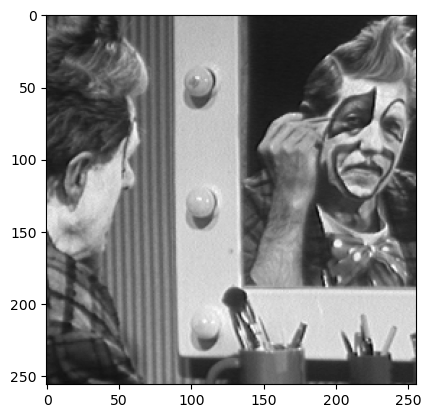

In [2]:
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE);
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [3]:
#mascara sobel derivada em x
sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

#mascara sobel derivada em y
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

height, width = img1.shape

In [4]:
#convolução
img_sobel_x = np.zeros_like(img1, dtype=float)
img_sobel_y = np.zeros_like(img1, dtype=float)

for i in range(1, height - 1):
    for j in range(1, width - 1):
        img_sobel_x[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_x)
        img_sobel_y[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_y)

In [5]:
img_sobel_x = img_sobel_x.astype(np.int64)
img_sobel_y = img_sobel_y.astype(np.int64)

In [6]:
#magnitude do gradiente
magnitude_gradiente = np.sqrt((img_sobel_x**2) + (img_sobel_y**2))

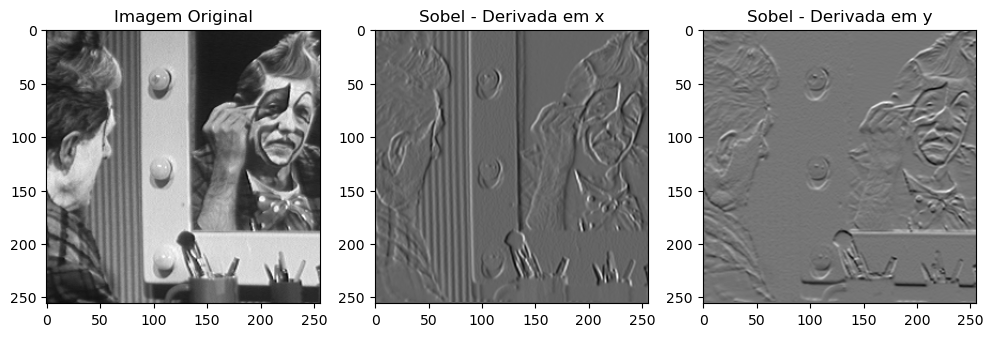

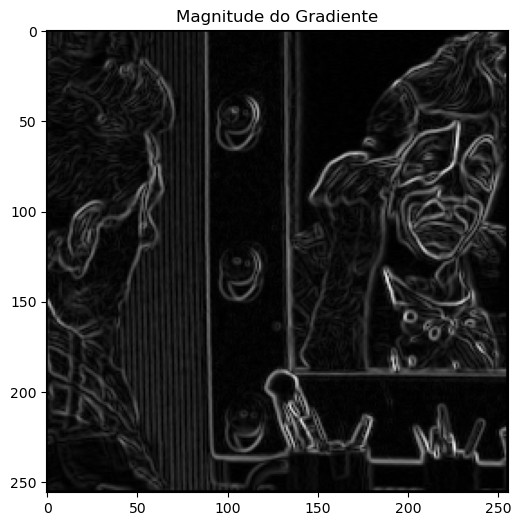

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img1, cmap='gray', vmin=0, vmax=255), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(img_sobel_x, cmap='gray'), plt.title('Sobel - Derivada em x')
plt.subplot(133), plt.imshow(img_sobel_y, cmap='gray'), plt.title('Sobel - Derivada em y')
plt.show()

# Exibir a magnitude do gradiente
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_gradiente, cmap='gray'), plt.title('Magnitude do Gradiente')
plt.show()

In [8]:
#mascara Roberts derivada em x
roberts_x = np.array([[1, 0],[0, -1]])

#mascara Roberts derivada em y
roberts_y = np.array([[0, 1],[-1, 0]])

height, width = img1.shape

In [9]:
#convolução
img_roberts_x = np.zeros_like(img1, dtype=np.float32)
img_roberts_y = np.zeros_like(img1, dtype=np.float32)

for i in range(1, height - 1):
    for j in range(1, width - 1):
        img_roberts_x[i, j] = np.sum(img1[i - 1:i + 1, j - 1:j + 1] * roberts_x)
        img_roberts_y[i, j] = np.sum(img1[i - 1:i + 1, j - 1:j + 1] * roberts_y)


img_roberts_x = img_roberts_x.astype(np.int64)
img_roberts_y = img_roberts_y.astype(np.int64)

In [10]:
#magnitude do gradiente
magnitude_gradiente_roberts = np.sqrt(img_roberts_x**2 + img_roberts_y**2)

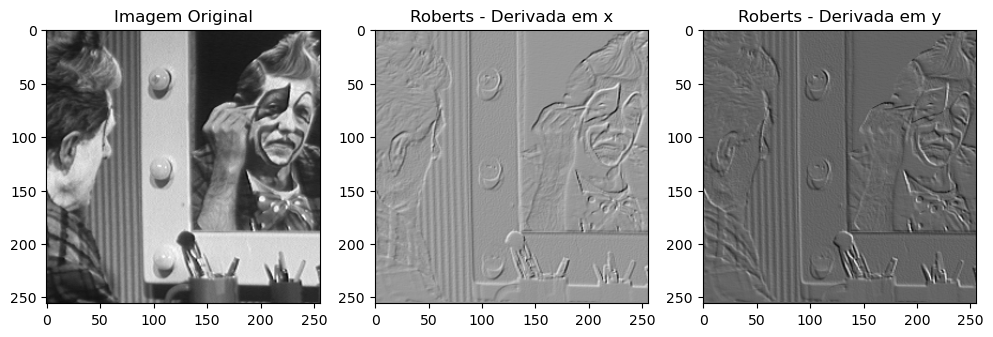

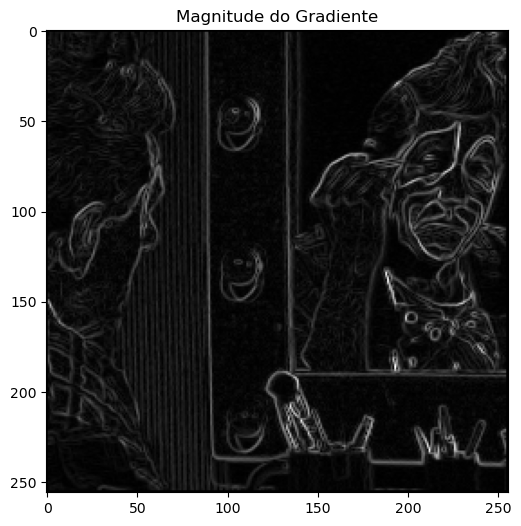

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img1, cmap='gray', vmin=0, vmax=255), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(img_roberts_x, cmap='gray'), plt.title('Roberts - Derivada em x')
plt.subplot(133), plt.imshow(img_roberts_y, cmap='gray'), plt.title('Roberts - Derivada em y')
plt.show()

# Exibir a magnitude do gradiente
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_gradiente_roberts, cmap='gray', vmin=0, vmax=255), plt.title('Magnitude do Gradiente')
plt.show()

Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

In [12]:
#(a) Filtro Laplaciano
mascara_laplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

height, width = img1.shape

#convolução
img_laplace = cv2.filter2D(img1, cv2.CV_32F, mascara_laplaciano)

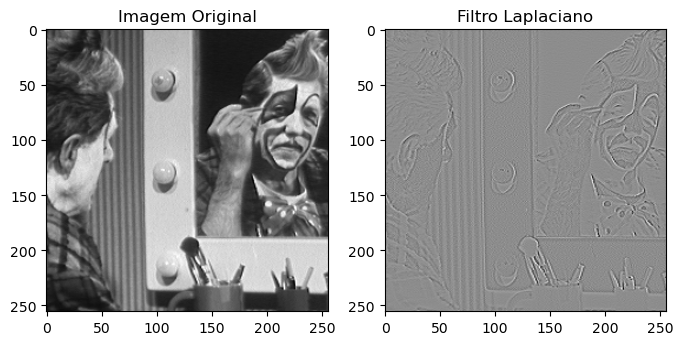

In [13]:
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(img1, cmap='gray'), plt.title('Imagem Original')
plt.subplot(122), plt.imshow(img_laplace, cmap='gray'), plt.title('Filtro Laplaciano')
plt.show()

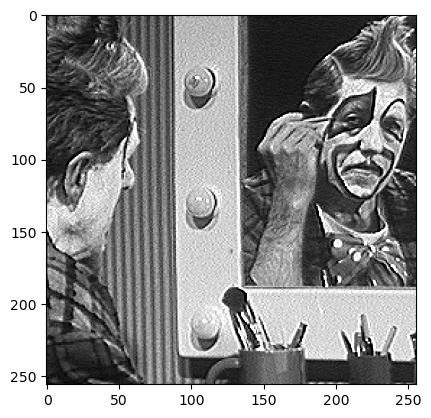

In [14]:
#centro da mascara negativo
c = -1

resultado = img1 + c * img_laplace
plt.imshow(resultado, cmap='gray', vmin=0, vmax=255);

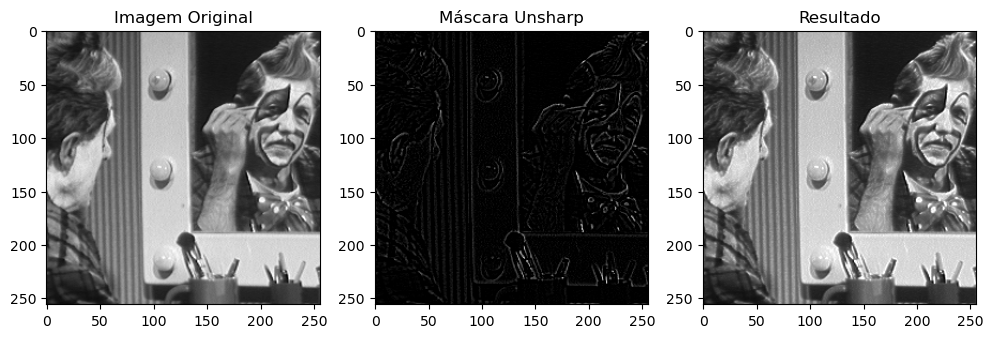

In [15]:
#(b) Unsharp masking

# 1) borrar imagem original
gaussiano = cv2.GaussianBlur(img1, (5, 5), 0)

# 2) subtrair imagem borrada da original-mascara eh a diferenca resultante
g_mask = cv2.subtract(img1, gaussiano)

#unsharp masking
k = 1

# 3) adicionar a máscara à imagem original
resultado = cv2.add(img1, (k * g_mask))


plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(img1, cmap='gray'), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(g_mask, cmap='gray'), plt.title('Máscara Unsharp')
plt.subplot(133), plt.imshow(resultado, cmap='gray'), plt.title('Resultado')
plt.show()

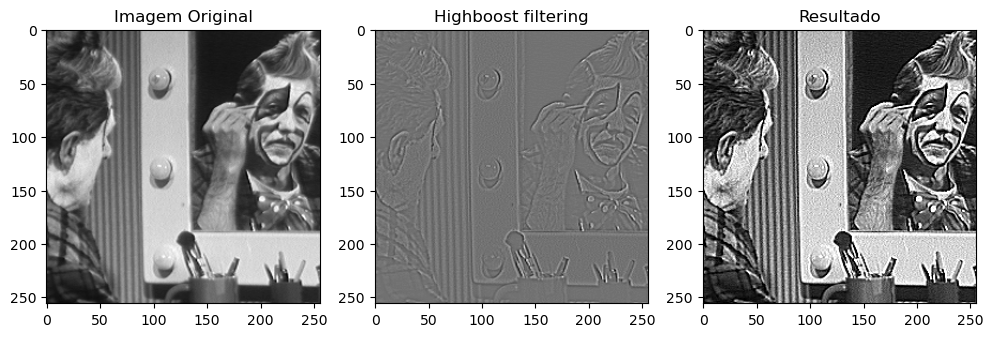

In [16]:
#(c) Highboost filtering (escolher um k>1)

imgH = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
imgH = imgH.astype(np.float64)


gaussiano = cv2.GaussianBlur(imgH, (5, 5), 0)
gaussiano = gaussiano.astype(np.float64)


g_mask = imgH - gaussiano
g_mask = g_mask.astype(np.float64)

#highboost filtering
k = 4.7

g_mask *= k

resultado = imgH + g_mask
resultado = np.clip(resultado, 0, 255)
resultado = resultado.astype(np.uint8)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(imgH, cmap='gray'), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(g_mask, cmap='gray'), plt.title('Highboost filtering')
plt.subplot(133), plt.imshow(resultado, cmap='gray'), plt.title('Resultado')
plt.show()

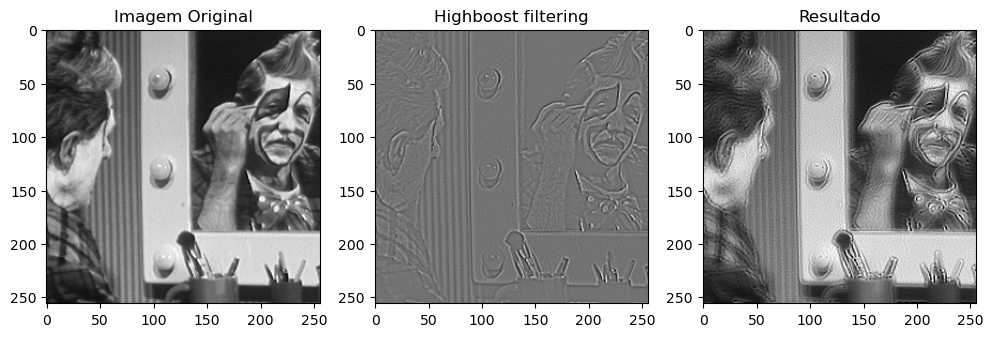

In [17]:
#(d) K <1 para atenuar

imgS = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

gaussianoS = cv2.GaussianBlur(imgS, (5, 5), 1.0)

imgS = imgS.astype(np.float64)
gaussianoS = gaussianoS.astype(np.float64)

g_maskS = imgS - gaussianoS

g_maskS = g_maskS.astype(np.float64)

#atenua nitidez
k = -4

resultadoS = imgS + k * g_maskS
resultadoS = np.clip(resultadoS, 0, 255)
resultadoS = resultadoS.astype(np.uint8)

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(imgS, cmap='gray'), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(g_maskS, cmap='gray'), plt.title('Highboost filtering')
plt.subplot(133), plt.imshow(resultadoS, cmap='gray'), plt.title('Resultado')
plt.show()


Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

In [18]:
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

In [19]:
#convolução
img_sobel_x = np.zeros_like(img1, dtype=np.float32)
img_sobel_y = np.zeros_like(img1, dtype=np.float32)

for i in range(1, img1.shape[0] - 1):
    for j in range(1, img1.shape[1] - 1):
        img_sobel_x[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_x)
        img_sobel_y[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_y)

In [20]:
#magnitude do gradiente
magnitude_gradiente = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

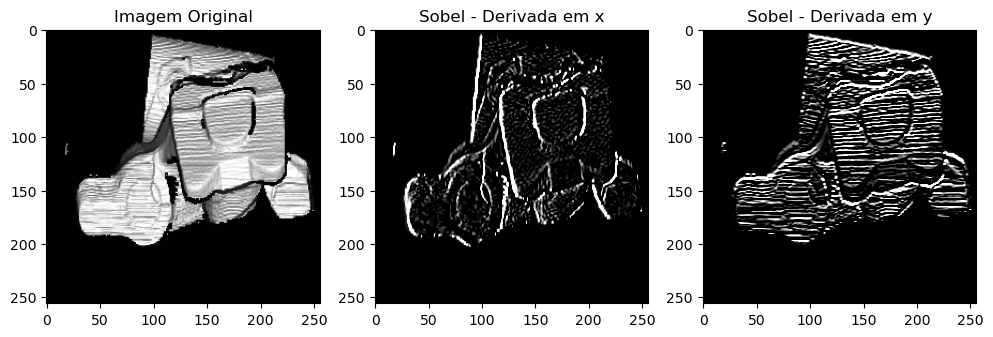

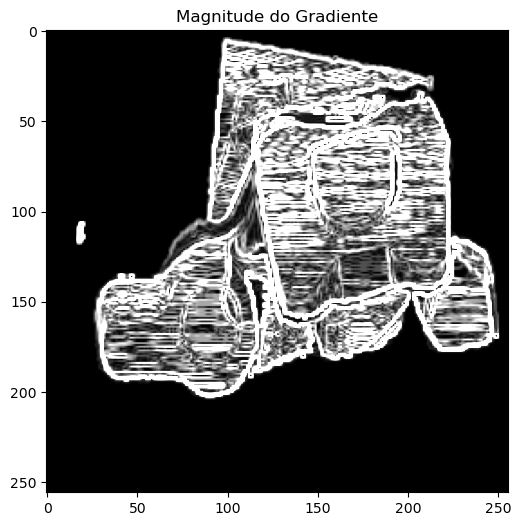

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img1, cmap='gray', vmin=0, vmax=255), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(img_sobel_x, cmap='gray', vmin=0, vmax=255), plt.title('Sobel - Derivada em x')
plt.subplot(133), plt.imshow(img_sobel_y, cmap='gray', vmin=0, vmax=255), plt.title('Sobel - Derivada em y')
plt.show()

# Exibir a magnitude do gradiente
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_gradiente, cmap='gray', vmin=0, vmax=255), plt.title('Magnitude do Gradiente')
plt.show()

Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

In [22]:
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

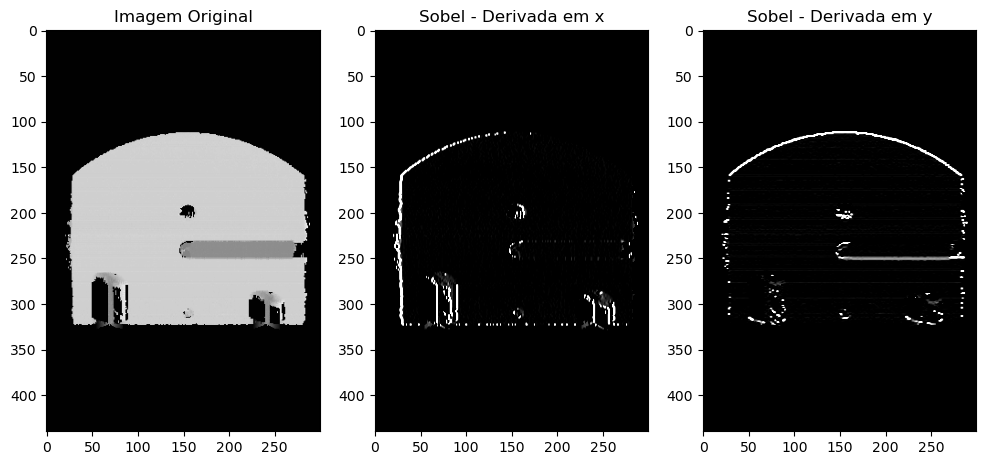

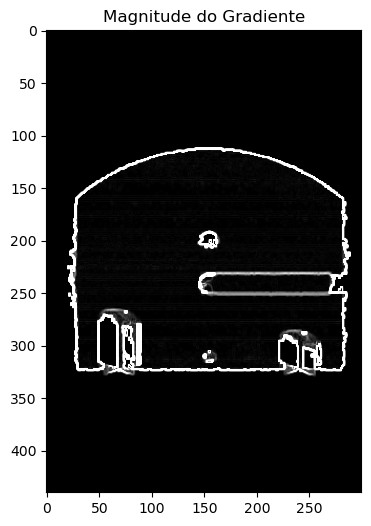

In [23]:
#convolução
img_sobel_x = np.zeros_like(img1, dtype=np.float32)
img_sobel_y = np.zeros_like(img1, dtype=np.float32)

for i in range(1, img1.shape[0] - 1):
    for j in range(1, img1.shape[1] - 1):
        img_sobel_x[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_x)
        img_sobel_y[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_y)

#magnitude do gradiente
magnitude_gradiente = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img1, cmap='gray', vmin=0, vmax=255), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(img_sobel_x, cmap='gray', vmin=0, vmax=255), plt.title('Sobel - Derivada em x')
plt.subplot(133), plt.imshow(img_sobel_y, cmap='gray', vmin=0, vmax=255), plt.title('Sobel - Derivada em y')
plt.show()

# Exibir a magnitude do gradiente
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_gradiente, cmap='gray', vmin=0, vmax=255), plt.title('Magnitude do Gradiente')
plt.show()

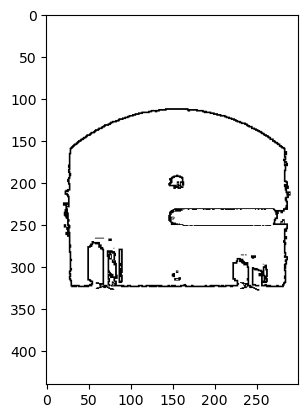

In [24]:
imagem_binarizada = (magnitude_gradiente < 150).astype(np.uint8)
plt.imshow(imagem_binarizada, cmap='gray');

Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

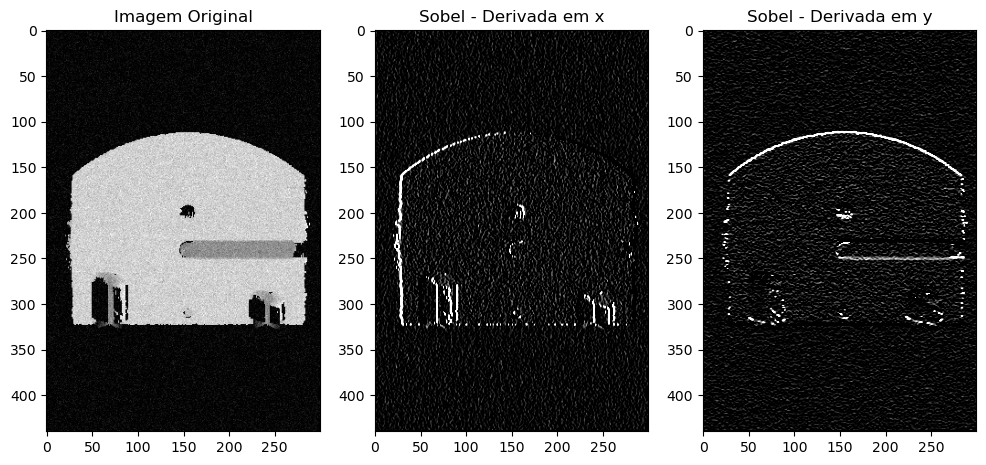

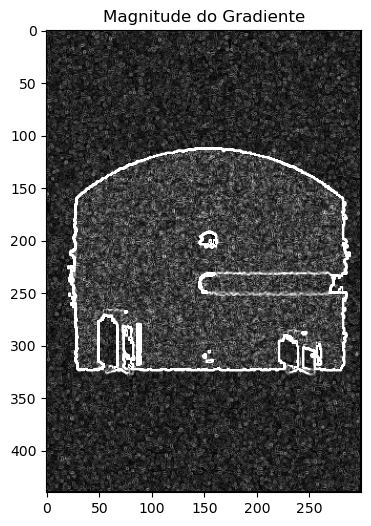

In [25]:
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

#convolução
img_sobel_x = np.zeros_like(img1, dtype=np.float32)
img_sobel_y = np.zeros_like(img1, dtype=np.float32)

for i in range(1, img1.shape[0] - 1):
    for j in range(1, img1.shape[1] - 1):
        img_sobel_x[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_x)
        img_sobel_y[i, j] = np.sum(img1[i - 1:i + 2, j - 1:j + 2] * sobel_y)

#magnitude do gradiente
magnitude_gradiente = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(img1, cmap='gray', vmin=0, vmax=255), plt.title('Imagem Original')
plt.subplot(132), plt.imshow(img_sobel_x, cmap='gray', vmin=0, vmax=255), plt.title('Sobel - Derivada em x')
plt.subplot(133), plt.imshow(img_sobel_y, cmap='gray', vmin=0, vmax=255), plt.title('Sobel - Derivada em y')
plt.show()

# Exibir a magnitude do gradiente
plt.figure(figsize=(6, 6))
plt.imshow(magnitude_gradiente, cmap='gray', vmin=0, vmax=255), plt.title('Magnitude do Gradiente')
plt.show()

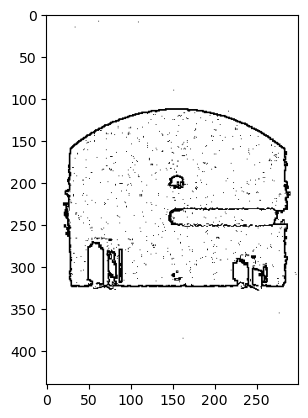

In [26]:
imagem_binarizada = (magnitude_gradiente < 150).astype(np.uint8)
plt.imshow(imagem_binarizada, cmap='gray');